#### Import packages

In [1]:
import numpy as np; pi = np.pi
import scipy.io as spio
import networkx as nx
import sys
import bisect
from qutip import *
from qutip.qip.operations.gates import gate_expand_2toN, gate_expand_1toN
import matplotlib as mpl
import matplotlib.pyplot as plt
from ptm.ptm import PTM
from matplotlib import cm
from ptm.ptm import *

#### Import Max Cut problem

Number of qubits = 8


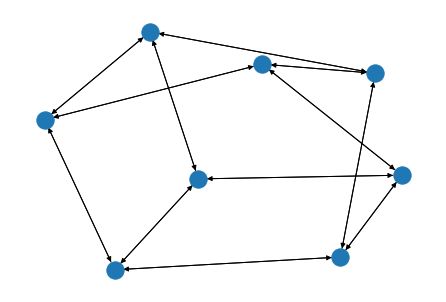

In [2]:
import scipy.io as spio
filename = 'instance_8_1'
mat = spio.loadmat("instances/" + filename + ".mat")
instance = mat['instance']
cost = instance['cost'][0,0]
r = instance['approxr'][0,0] # approximation ratio
graph = instance['graph'][0,0]
J = graph.todense()/2
G = nx.DiGraph(graph.todense()) # create graph
N = int(np.log2(len(cost)))
C = Qobj(np.diag(cost.flatten()), dims = [[2]*N, [2]*N]) # Quantum Hamiltonian
print("Number of qubits =",N)
nx.draw(G)
plt.show()

#### Ideal PTM

In [13]:
# Iteration level
p = 1
gamma = instance['gamma'][0,0][0][p-1].flatten()
beta = instance['beta'][0,0][0][p-1].flatten()

psi = (basis(2,0) + basis(2,1)).unit()
rho = ket2dm(tensor([psi for i in range(N)]))
rho_vec = rho_to_pauli_basis(rho)

U = 1
for i in range(p):
    temp1 = carb_ptm(gamma[i])
    temp2 = rx_ptm(2*beta[i])
    for j in range(N-1):
        for k in range(j+1,N):
            if J[j,k] != 0.:
                U = ptm_expand_2toN(temp1, N=N, targets=[j,k]) * U
    for j in range(N):   
        U = ptm_expand_1toN(temp2, N=N, target=j) * U
rho_final = pauli_basis_to_rho(U*rho_vec)

#### Calculate the success probability and the approximation ratio

In [15]:
cost_min = min(cost)
z = np.argwhere(cost == cost_min) 

In [16]:
success = np.real(sum(rho_final[int(z[i,0]),int(z[i,0])] for i in range(len(z))))*100
print("Success Probability = %s %%" %round(success,2))

Success Probability = 32.17 %


In [17]:
# expectation value
expval = (C*rho_final).tr()
approxr = expval / cost_min[0]
print("Approximation Ratio = %s" %round(approxr,3))

Approximation Ratio = 0.831


#### CV PTM

In [3]:
# Iteration level
p = 1
gamma = instance['gamma'][0,0][0][p-1].flatten()
beta = instance['beta'][0,0][0][p-1].flatten()
cv_ptm = PTM()

#### Optimization problem

In [4]:
temp2 = cv_ptm.rx(2*beta)

50.0%. Run time:   0.73s. Est. time left: 00:00:00:00
Total run time:   0.73s
50.0%. Run time:   0.84s. Est. time left: 00:00:00:00
Total run time:   0.84s
50.0%. Run time:   0.84s. Est. time left: 00:00:00:00
Total run time:   0.84s
50.0%. Run time:   0.87s. Est. time left: 00:00:00:00
Total run time:   0.87s


In [5]:
temp1 = qload("results/"+filename+"_carb_p_1_1")

Loaded Qobj object:
Quantum object: dims = [[2, 2], [2, 2]], shape = (16, 16), type = oper, isHerm = False



In [6]:
# Create the initial state
psi = (basis(2,0) + basis(2,1)).unit()
rho = ket2dm(tensor([psi for i in range(N)]))
rho_vec = rho_to_pauli_basis(rho)

65535


In [7]:
qsave(rho_vec,'results/rho_vec')

In [8]:
U = 1
x = 0
for i in range(p):
    for j in range(N-1):
        for k in range(j+1,N):
            if J[j,k] != 0.:
                x +=1 
                print(x)
                U = ptm_expand_2toN(temp1, N=N, targets=[j,k]) * U
    for j in range(N):   
        U = ptm_expand_1toN(temp2, N=N, target=j) * U
rho_final = pauli_basis_to_rho(U*rho_vec)

1
2
3
4
5
6
7
8
9
10
11
12


#### Calculate the success probability and the approximation ratio

In [13]:
qsave(rho_final,"results/"+filename+"_rho_final_p_1")

In [18]:
rho_final.tr()

0.9999999999999988

In [19]:
cost_min = min(cost)
z = np.argwhere(cost == cost_min) 

In [24]:
success = np.real(sum(rho_final[int(z[i,0]),int(z[i,0])] for i in range(len(z))))*100
print("Success Probability = %s %%" %round(success,2))

Success Probability = 29.04 %


In [25]:
# expectation value
expval = (C*rho_final).tr()
approxr = expval / cost_min[0]
print("Approximation Ratio = %s" %round(approxr,3))

Approximation Ratio = 0.817
